# Statistics Exercise 2: Statistical Hypothesis Testing

In this exercise we will apply some of the concepts we have learned about statistical hypothesis testing on some toy datasets.

## Part 1: Sampling from a Normal Distribution

**Questions:**
  1. Create a variable X and assign to it a NumPy array containing 1000 samples from a normal distribution $\mathcal{N}(438, 35)$. (Use np.random.normal(), and note that $\sigma^2 = 35$ is the variance.)
  2. Plot a histogram of the values in X, using 50 bins.
  3. What is the sample mean of X?
  4. Use the formulas from lecture to calculate biased and unbiased sample variances $\hat{\sigma_b^2}$ and $\hat{\sigma^2}$. Which is closer to the variance of the underlying distribution?
  5. Use *np.var* to calculate the biased and unbiased sample variances. Did you get the same values as in 4?


In [383]:
# 1.Create a variable X and assign to it a NumPy array containing 1000 samples from a 
# normal distribution  N=(438,35) . 
# (Use np.random.normal(), and note that  𝜎2=35  is the variance.)
import numpy as np
import math

X = np.random.normal(438,math.sqrt(35),1000)
X

array([435.79276231, 443.92995061, 434.92367441, 435.21558772,
       439.69044059, 420.55168461, 435.41506783, 439.61983007,
       438.78019673, 436.12216401, 435.69494839, 439.81792486,
       434.87015506, 443.74759158, 441.02370708, 436.71105988,
       442.41607845, 448.04683916, 435.78215515, 439.65377521,
       442.12592256, 435.2556597 , 437.64408052, 443.9453383 ,
       427.48483463, 435.57385124, 432.36139779, 434.82947104,
       440.19663973, 430.11554919, 436.89989887, 446.43986185,
       437.11620687, 444.08816435, 443.76045167, 440.61409989,
       438.64709124, 448.46302882, 434.12751648, 442.26202618,
       438.78387127, 432.47766536, 435.67714517, 429.9609283 ,
       435.26633577, 436.25881843, 436.98605243, 427.03281915,
       440.81999977, 432.842439  , 435.57325689, 434.2155025 ,
       440.78775236, 436.42992256, 440.53575793, 431.72532261,
       434.01970906, 424.1446215 , 433.21388608, 431.09283991,
       440.85291805, 447.68085231, 435.1435603 , 436.80

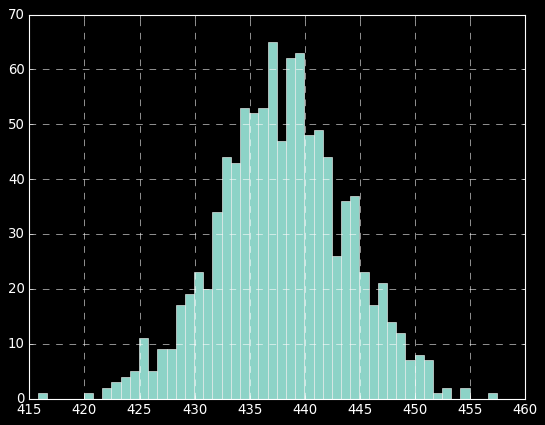

In [384]:
# 2.Plot a histogram of the values in X, using 50 bins.
import matplotlib.pyplot as plt

plt.hist(X, bins=50)
plt.style.use('dark_background')
plt.show()

In [385]:
# 3.What is the sample mean of X?
X_mean = X.mean()
X_mean

437.920983843102

In [386]:
# 4.Use the formulas from lecture to calculate biased and unbiased sample variances  𝜎2𝑏^  and  𝜎2^ . 

biased_stat =  1/len(X) * np.array([(x_i - X_mean) ** 2 for x_i in X]).sum()
unbiased_stat = 1/(len(X) - 1) * np.array([ (x_i - X_mean) ** 2 for x_i in X]).sum()

# Which is closer to the variance of the underlying distribution?
# 35  is the variance
print(biased_stat, unbiased_stat)
print('the biased sample variances is: ',biased_stat,
      '\nthe unbiased sample variances is :', unbiased_stat)

34.40374246892091 34.43818064957048
the biased sample variances is:  34.40374246892091 
the unbiased sample variances is : 34.43818064957048


In [387]:
#5.Use np.var to calculate the biased and unbiased sample variances. 
biased = np.var(X)
unbiased= np.var(X, ddof=1)
# Did you get the same values as in 4?
print('the biased sample variances is: ',biased,'\nthe unbiased sample variances is :', 
      unbiased,'\nAnd we got the same values as in 4')

the biased sample variances is:  34.40374246892091 
the unbiased sample variances is : 34.43818064957048 
And we got the same values as in 4


# Part 2: Fitting a normal curve to data

**Questions:**
  6. Load the dataset of Connecticut Accidental Drug Related Deaths located at https://data.ct.gov/api/views/rybz-nyjw/rows.csv into a Pandas DataFrame df. You may give the URL directly as the argument to pd.read_csv(), rather than downloading the file locally.
  7. Plot a histogram of the 'Age' field. Use density=True so that the y values represent proportions rather than counts. How many non-empty data points does this contain? (Hint: the Pandas function isna() may help you)
  8. Since this looks roughly bell-curve shaped, we will try to guess what the underlying normal distribution for the Age data might be. What do you think are the most likely values for the parameters of the normal distribution that this data came from?
  9. Graph the normal distribution with these parameters on top of the histogram. You should get a normal curve that is similar in shape to the histogram. Hint: You may use scipy.stats.norm.pdf.

In [388]:
# 6.Load the dataset of Connecticut Accidental Drug Related Deaths located 
# at https://data.ct.gov/api/views/rybz-nyjw/rows.csv into a Pandas DataFrame df. 
# You may give the URL directly as the argument to pd.read_csv(), 
# rather than downloading the file locally.
import pandas as pd

data = pd.read_csv('https://data.ct.gov/api/views/rybz-nyjw/rows.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5105 non-null   object 
 1   Date                 5103 non-null   object 
 2   DateType             5103 non-null   object 
 3   Age                  5102 non-null   float64
 4   Sex                  5099 non-null   object 
 5   Race                 5092 non-null   object 
 6   ResidenceCity        4932 non-null   object 
 7   ResidenceCounty      4308 non-null   object 
 8   ResidenceState       3556 non-null   object 
 9   DeathCity            5100 non-null   object 
 10  DeathCounty          4005 non-null   object 
 11  Location             5081 non-null   object 
 12  LocationifOther      590 non-null    object 
 13  DescriptionofInjury  4325 non-null   object 
 14  InjuryPlace          5039 non-null   object 
 15  InjuryCity           3349 non-null   o

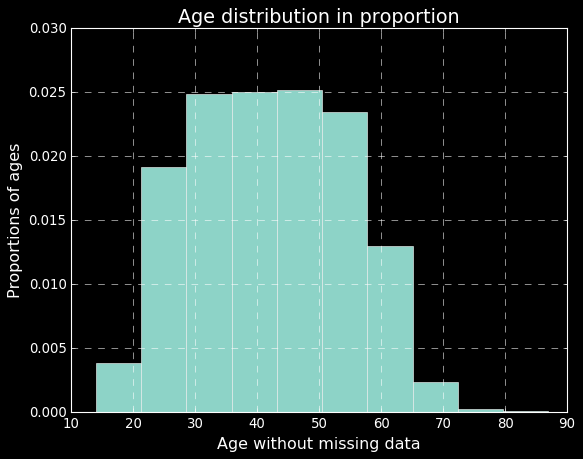

the count of rows with non_empty_data points is: 5102


In [389]:
# 7.Plot a histogram of the 'Age' field. Use density=True so that the y values represent
# proportions rather than counts. How many non-empty data points does this contain? 
# (Hint: the Pandas function isna() may help you)
import matplotlib.pyplot as plt

plt.ylabel('Proportions of ages')
plt.xlabel('Age without missing data')
plt.title('Age distribution in proportion')
plt.hist(data_clean, density=True)
plt.show()

data_clean = data.Age[~data['Age'].isna()]
print('the count of rows with non_empty_data points is:',data_clean.isna().count())

In [390]:
# 8.Since this looks roughly bell-curve shaped, we will try to guess what 
# the underlying normal distribution for the Age data might be. 
# What do you think are the most likely values for the parameters of the normal distribution 
# that this data came from?
import numpy as np


data_clean_mean = data_clean.mean()
data_clean_std = np.sqrt(data_clean.var(ddof=1))

print('Sample mean is {} and std is {}\n '.format(data_clean_mean,data_clean_std))

print('''Normal distributions are defined by two parameters, the mean (μ) and the standard deviation (σ).
68% of the area of a normal distribution is within one standard deviation of the mean.
Approximately 95% of the area of a normal distribution is within two standard deviations of the mean.''')

Sample mean is 41.96491571932575 and std is 12.336638618529225
 
Normal distributions are defined by two parameters, the mean (μ) and the standard deviation (σ).
68% of the area of a normal distribution is within one standard deviation of the mean.
Approximately 95% of the area of a normal distribution is within two standard deviations of the mean.


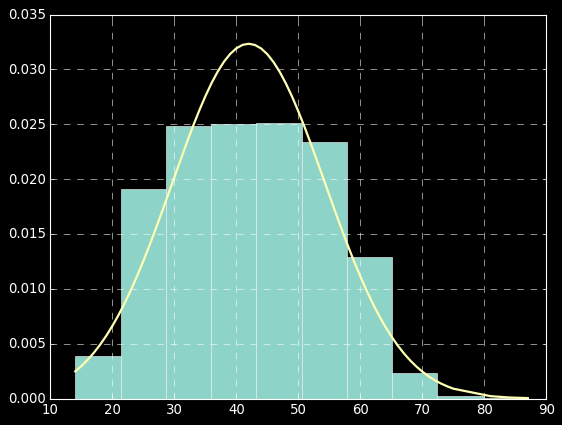

In [391]:
# 9.Graph the normal distribution with these parameters on top of the histogram. 
# You should get a normal curve that is similar in shape to the histogram.
# Hint: You may use scipy.stats.norm.pdf.
from scipy.stats import norm

data_clean = np.sort(data_clean)
pdf = norm.pdf(data_clean, data_clean_mean, np.sqrt(data_clean_var))
plt.hist(data_clean, density=True)
plt.plot(data_clean, pdf)
plt.show()

## Part 3: Birthday Months

**Questions**
10. Load the dataset of Catholic Bishop Birthdays located at https://opendata.arcgis.com/datasets/c31cc4fa72c94f8092d6a7f565ed5e7c_0.csv into a dataframe df2. We only want to load the columns 'Bishops_ALL_Name' and 'Bishops_ALL_BirthMonth', so specify these in the argument usecols= when you call pd.read_csv. How many bishops have birth months listed?
11. Use the Pandas function value_counts() to see how often each birthday month occurs. In which month were the most bishops born?
12. Run a chi-squared test to see whether months are drawn from a categorical distribution with equal frequencies (like rolling a fair twelve-sided die). What p-value do you get? What do you conclude?

In [392]:
# 10.Load the dataset of Catholic Bishop Birthdays located at 
# https://opendata.arcgis.com/datasets/c31cc4fa72c94f8092d6a7f565ed5e7c_0.csv into a dataframe df2. 
# We only want to load the columns 'Bishops_ALL_Name' and 'Bishops_ALL_BirthMonth', so specify these in 
# the argument usecols= when you call pd.read_csv. How many bishops have birth months listed?
import pandas as pd

data = pd.read_csv('https://opendata.arcgis.com/datasets/c31cc4fa72c94f8092d6a7f565ed5e7c_0.csv',usecols=['Bishops_ALL_Name', 'Bishops_ALL_BirthMonth'])
data.info()
num_of_bishops = data.Bishops_ALL_BirthMonth.isna().value_counts()[0]
print('\nHere is visible that the bishops have birth months listed {} times'.format(num_of_bishops))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2531 entries, 0 to 2530
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bishops_ALL_Name        2531 non-null   object 
 1   Bishops_ALL_BirthMonth  2518 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.7+ KB

Here is visible that the bishops have birth months listed 2518 times


In [393]:
# 11. In which month were the most bishops born?
print('In {} month were the most bishops born \n'.format(data.Bishops_ALL_BirthMonth.value_counts().idxmax()))

#Use the Pandas function value_counts() to see how often each birthday month occurs. 
data.Bishops_ALL_BirthMonth.dropna()
b_days_count = data.Bishops_ALL_BirthMonth.value_counts()

print('Each birthday month occurancy')
print(b_days_count.tolist())

In 6.0 month were the most bishops born 

Each birthday month occurancy
[236, 223, 218, 217, 214, 213, 209, 208, 207, 207, 198, 168]


In [394]:
# 12.Run a chi-squared test to see whether months are drawn from a categorical distribution 
# with equal frequencies (like rolling a fair twelve-sided die). 
import scipy as sp
import pandas as pd

chi_squared_test = sp.stats.chisquare(b_days_count)
# What p-value do you get? 
print('The chi_squared_test result is:\n{}'.format(chi_squared_test))

The chi_squared_test result is:
Power_divergenceResult(statistic=13.885623510722795, pvalue=0.23938715178151143)


This tells us that the observed data have χ 2 statistic value 13.885623510722795 and p=0.23938715178151143 

Since the p-value is bigger than 0.05, we should accept the null hypothesis ,
i.e. we can interfere that months distribution are of equal frequencies distribution.


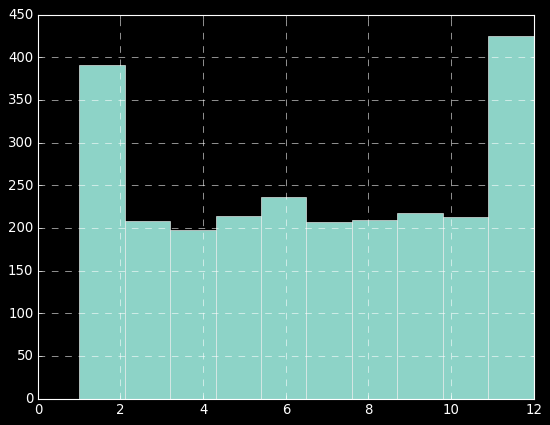

In [397]:
print('This tells us that the observed data have χ 2 statistic value {} and p={} \n\nSince the p-value is bigger than 0.05, we should accept the null hypothesis ,\ni.e. we can interfere that months distribution are of equal frequencies distribution.'.format(chi_squared_test[0],chi_squared_test[1]))

plt.hist(data.Bishops_ALL_BirthMonth)
plt.show()